In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

- Import Dataset

- Unsupervised ML problem

In [54]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [55]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


- Rename Columns

In [56]:
 df = df.rename(columns = {'CustomerID': 'CustomerID', 'Gender':'Gender', 'Age':'Age', 'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)': 'Spending Min.'})

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Min.
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- Basic Details about Dataset

In [58]:
df.shape

(200, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Annual Income  200 non-null    int64 
 4   Spending Min.  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
df.describe()

,CustomerID,Age,Annual Income,Spending Min.
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [61]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Min.,0


- Encode the 'Gender' Column

In [62]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [63]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income,Spending Min.
199,200,0,30,137,83
99,100,0,20,61,49
5,6,1,22,17,76
151,152,0,39,78,88
113,114,0,19,64,46


- Find Cluster Numbers

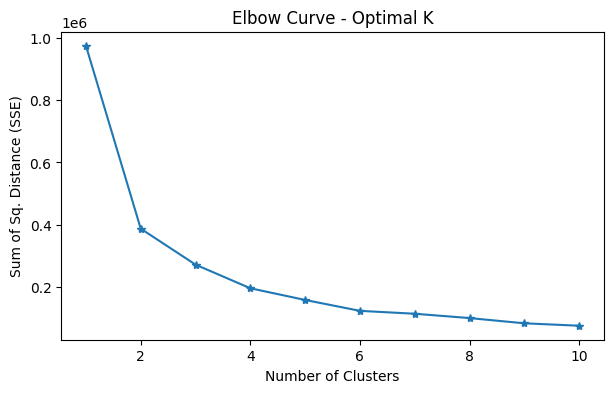

In [64]:
x = df[['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Min.']]

# Elbow method
sse = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, random_state =22)
  kmeans.fit(x)
  sse.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize = (7, 4))
plt.plot(range(1, 11), sse, marker = '*')
plt.title('Elbow Curve - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Sq. Distance (SSE)')
plt.show()

- Assume the no. of 'k' whenever the Elbow curve is stabilized...-->> here, it is 5

In [71]:
kmeans = KMeans(n_clusters = 3, random_state = 22)
df['Cluster'] = kmeans.fit_predict(x)

In [72]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income,Spending Min.,Cluster,Cluster_names
70,71,0,70,49,55,2,Monthly
144,145,0,25,77,12,1,Weekly
57,58,0,69,44,46,0,Monthly
84,85,1,21,54,57,2,Monthly
89,90,1,50,58,46,2,Monthly


- Define Cluster Names

In [73]:
cluster_names = {0 : 'Weekly', 1: "Monthly", 2: 'Often'}
df['Cluster_names'] = df['Cluster'].map(cluster_names)

In [74]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income,Spending Min.,Cluster,Cluster_names
18,19,0,52,23,29,0,Weekly
97,98,1,27,60,50,2,Often
6,7,1,35,18,6,0,Weekly
145,146,0,28,77,97,1,Monthly
77,78,0,40,54,48,2,Often


- Graphs

Text(0.5, 1.0, 'Clusters of Customers')

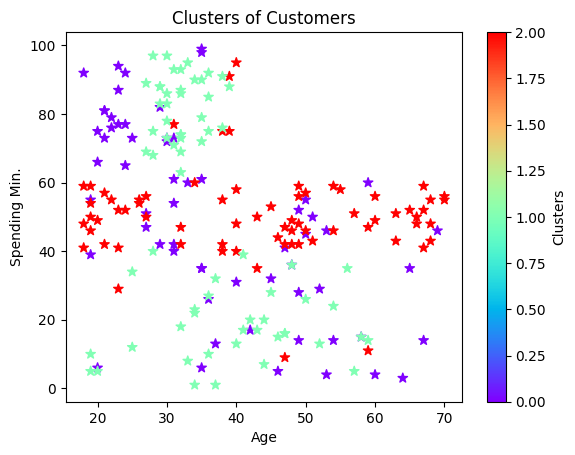

In [75]:
plt.scatter(df['Age'], df['Spending Min.'], c = df['Cluster'], cmap = 'rainbow', marker = '*', s= 50)
plt.xlabel('Age')
plt.ylabel('Spending Min.')
plt.colorbar(label = 'Clusters')
plt.title('Clusters of Customers')

- Accuracy

In [76]:
print(silhouette_score(x, df['Cluster']))

0.3766801400675223
